# Ford GoBike Exploration

## Investigation Overview

In this investigation, I wanted to look at the user behaviour on ride duration, displacement, timing etc that can be used to predict the traffic at a station in a given point of time and improve the bike sharing service. The main focus was on the ride duration, displacement, start station, end station and day, and time of ride.

## Dataset Overview

The data consisted of the ride detatails of 519700 Ford GoBike Rides. The attributes included duration_sec, start_time, end_time, start_station_id, end_station_id, start_station_name, end_station_name, bike_id, user_type, month, day, and hour details.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('master_cleaned.csv')

## Distribution of Users
Most of the users of the bike sharing service are Subscribers while the customers are very less 


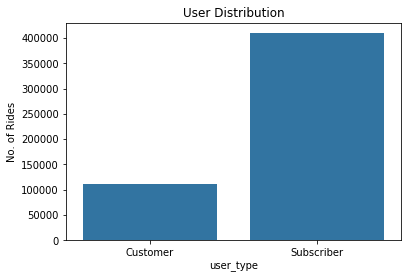

In [3]:
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='user_type', color=base_color);
plt.title('User Distribution');
plt.ylabel('No. of Rides');

## Distribution of Ride Durations
This duration of a ride takes on huge values form 0 to 30000 plotted on a logarithmic scale. We can see that the distribution is skew and most of the rides are of short duration that is within 20 minutes.

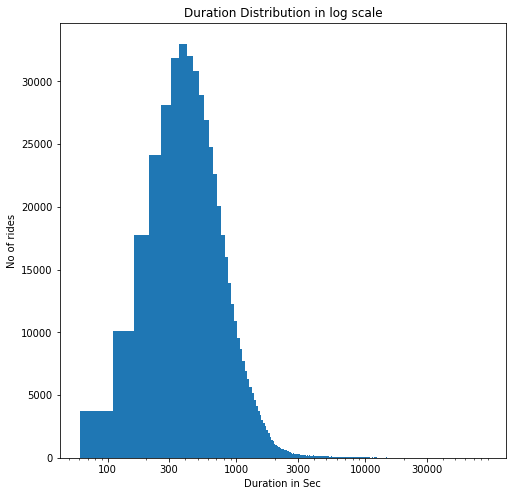

In [4]:
plt.figure(figsize=(8,8))
bins = np.arange(df.duration_sec.min(), df.duration_sec.max()+50, 50)
plt.hist(data=df, x='duration_sec', bins=bins);
plt.title('Duration Distribution in log scale')
plt.xlabel('Duration in Sec')
plt.ylabel('No of rides')
plt.xscale('log');
ticks = [100, 300, 1000, 3000,10000, 30000]
plt.xticks(ticks, ticks);

## Day wise distribution of rides
The number of rides are constant on weekdays that is from Monday-Friday and then it decreases on Saturday and Sunday.

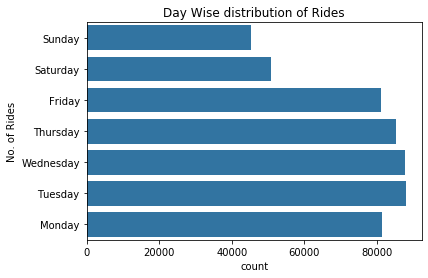

In [17]:
base_color = sns.color_palette()[0]
sns.countplot(data=df, y='day', color=base_color);
plt.title('Day Wise distribution of Rides');
plt.ylabel('No. of Rides');

## Hour wise distribution of rides
This distribution is bi-modal with one peak at 8:00 and another at 17:00. Suggesting that the users are office commuters. Therefore most of the subscribers are office commuters.

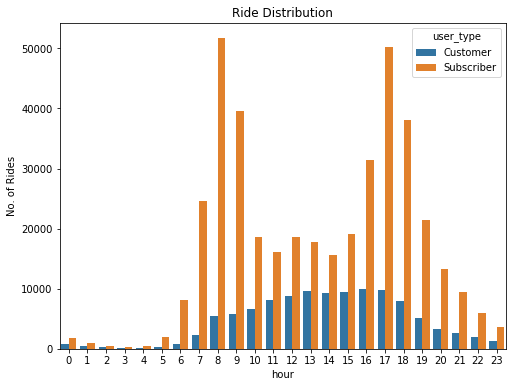

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(data = df, x = 'hour', hue='user_type');
plt.ylabel('No. of Rides');
plt.title('Ride Distribution');

## Relation between Starting Station and Ending Station
The starting station id is highly related to the ending station id which suggests that the users prefer to commute between some specific stations.

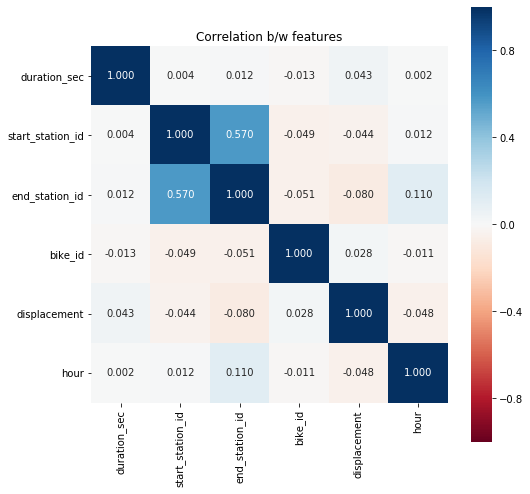

In [11]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(df.corr(), cmap = 'RdBu',  square=True, vmin=-1, vmax=1, annot=True, fmt = '.3f');
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation b/w features');

## Mean Ride Duration of Users
The mean ride duration of a Customer is more than a subscriber. The Customer mean ride duration is 43 minutes whereas a subscriber mean ride duratio is only 12.5 minutes.

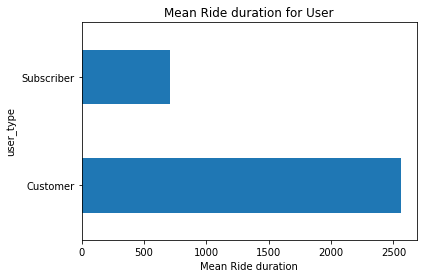

In [12]:
df.groupby('user_type').duration_sec.mean().plot(kind='barh');
plt.title('Mean Ride duration for User');
plt.xlabel('Mean Ride duration');

## Weekday Traffic vs Weekend Traffic
Weekdays have a lot of traffic at 8:00 and 17:00 while the weekends do not have a general trend.

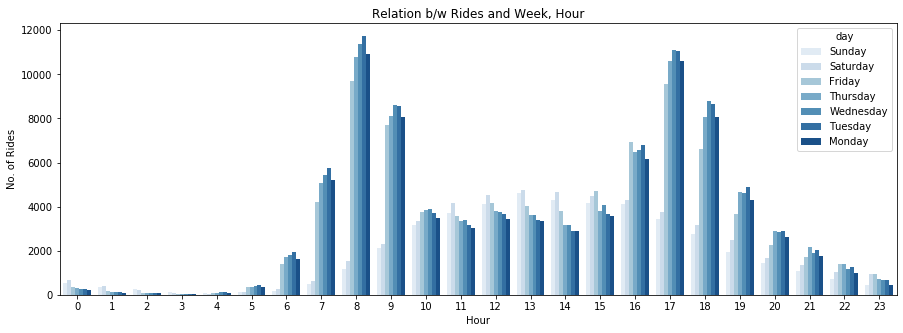

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='hour', hue='day', palette = 'Blues');
plt.title('Relation b/w Rides and Week, Hour');
plt.xlabel('Hour');
plt.ylabel('No. of Rides');